# Statistikk fra Bokhylla på _jøde_

Bare hopp over den første biten til dere kommer til en neste hovedoverskrift. Deretter kan narrative følges.

##### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
import urllib.request, shutil
with urllib.request.urlopen("https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py") as response, open("module_update.py", 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

##### Get essentials

Import text and graph modules for analysis, and css for display

In [2]:
from module_update import update, css

file nbtext.py exists - call update('nbtext', overwrite=True) in order to download nbtext.py anyway


In [3]:
css()

##### Module imports

In [10]:
update('graph_networkx_louvain')
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline

file graph_networkx_louvain.py exists - call update('graph_networkx_louvain', overwrite=True) in order to download graph_networkx_louvain.py anyway


# Bygg korpus og analysér

Hent URN-er fra tekst eller metadata. URNene representer korpuset, eller en definisjon av korpuset. Korpuset bygges med ordene som metadata lagt inn i variabelen `words`. Korpusets URNer ligger i variabelen `korpusår`.

In [5]:
words = """ jøde, jøden, jøder, jødene, jøderne, jødisk, jødiske""".split(', ')
words = words + [x.capitalize() for x in words]
korpusår = dict()
for anno in range(1920, 1941):
    korpusår[anno] = nb.get_urn({'words':words, 'year':anno, 'next':0, 'limit':1000})

## Oversikt pr år

Her er statistikk over alle bøkene som inneholder minst en av ordene i `words`. Variabelen `anno_data` innholder statistikken over antall bøker fordelt på år, se også stolpediagrammet under.

In [6]:
anno_data = pd.DataFrame.from_dict({a: len(korpusår[a]) for a in korpusår}, orient='index')

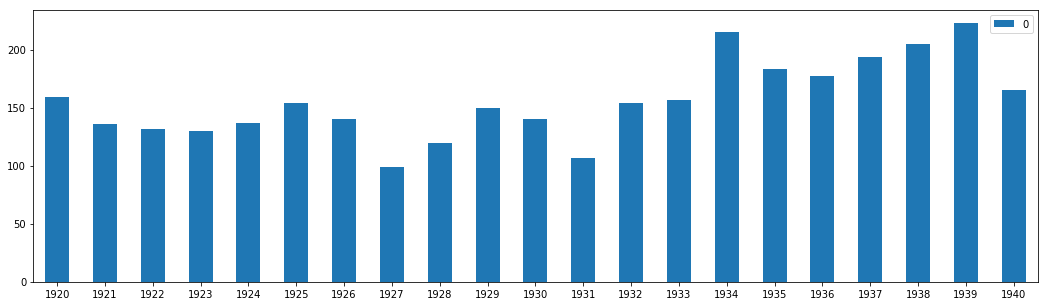

In [7]:
anno_data.plot(kind='bar', figsize=(18,5), rot=0)

Det totale antallet bøker for perioden 1920-1940 som inneholder en av ordene i `words` er 3277.

In [8]:
int(anno_data.sum())

3277

## Liste over verk

In [9]:
urn_prefix = "https://urn.nb.no/URN:NBN:no-nb_digibok_"

In [26]:
whole_list = ""
for year in korpusår:
    yearlist = '\n'.join(["""<tr><td><a href="https://urn.nb.no/URN:NBN:no-nb_digibok_{urn}" target=_blank">{title}</a></td><td>{author}</td><td>{anno}</td><tr>""".format(urn=x[0], title=x[2], author=x[1], anno=x[3])
            for x in korpusår[year]])
    text = """<h1>{year}</h1><table>{table}</table>""".format(year=year, table=yearlist)
    whole_list += text

In [27]:
HTML(whole_list)

Klar og usvigelig Veiledning til Fred,"Rosenius, C.O.",1920
Det religiøse problem,"Eriksen, Richard",1920
Leo Tolstoi,"Collin, Chr.",1920
Folkelige grundtanker,"Bruun, Christopher",1920
ede romaner,"Christensen, Hjalmar",1920
Manes,"Jacobsen, J.P.",1920
Fjerdemand,"Riverton, Stein",1920
Deilig er jorden,,1920
Geografi for Folkeskolen,"Nørlyng, Thorvald",1920
"Kristus som Gud, eller Verdensmisjonens samlingstema","Lee, Charles",1920
Norsk samfundslære til skolebruk,"Taranger, Absalon",1920


Lagre filen til egen HTML.

In [28]:
html_file = """<html><head><meta charset="UTF-8"></head><body>{table}</body></html>""".format(table=whole_list)
with open('ståle_madelen.html', 'w', encoding='utf-8') as htmlfile:
    htmlfile.write(html_file)